In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Importing the dataset
dataset = pd.read_csv("Position_Salaries.csv")

In [34]:
# Glipmse of dataset
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [35]:
# Size of dataset
dataset.size

30

In [36]:
# Extracting X_training samples
X = dataset.iloc[:, 1:2].values
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [37]:
# Extracting y_training samples
y = dataset.iloc[:, 2].values
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [39]:
# Fitting SVR to training set
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')
model.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [40]:
# Predicting the results
y_prediction = sc_y.inverse_transform(model.predict(sc_x.transform(np.array([[6.5]]))))
print(y_prediction)

[170370.0204065]


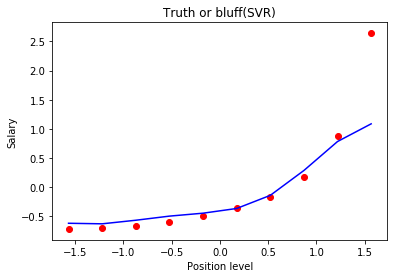

In [41]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, model.predict(X), color = 'blue')
plt.title('Truth or bluff(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()